# PREDICTING EMPLOYEE BURNOUT

The dataset used in this project was retrieved from a Kaggle competition: "". There is not much known about this sample in terms of their geographic location, the type of work/industry they are in; which I believe would have been vital to the conclusions of this study. 

There are two goals I hope to achieve here:

-Determining whether the variables in this dataset can indeed predict an employee's burnout

-Creating a model that predicts an employee burnout, given these metrics.

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
dataset="https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out"

In [5]:
od.download(dataset)

Skipping, found downloaded files in ".\are-your-employees-burning-out" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir=".\\are-your-employees-burning-out"

In [8]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'train.csv']

In [9]:
data_filename=data_dir + '/train.csv'

In [10]:
df=pd.read_csv(data_filename)

In [11]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [12]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

Gender: The gender of the employee (Male/Female)

Company Type: The type of company where the employee is working (Service/Product)

WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.

Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)

Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue. This is self reported

Burn Rate: The value we need to predict for each employee telling the rate of Burn out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

# DATA CLEANING

#Find any Duplicates in the DATA

In [13]:
df.duplicated(subset=['Employee ID']).any()

False

In [14]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


#Change DataTypes

The datetime of joining will not be a useful variable in creating a model unless it becomes a retention metric, i.e: how long has an employee been with the company? For this matter we will transform this object into an int type that tells you the tenure of the employee. We will assume that the last date recorded to be day 1 of tenure. 

In [15]:
import datetime as dt
df['Date of Joining']= pd.to_datetime(df['Date of Joining'])

#find the latest date in dataframe and set that to be day 1 of tenure
df["max_date"]=max(df['Date of Joining'])
df["max_date"] =  pd.to_datetime(df["max_date"])

#find tenure days
df['Tenure'] = df['max_date'] - df["Date of Joining"]
df['Tenure']=df['Tenure'].dt.days

#drop unnecessary columns
df=df.drop(['Date of Joining', 'max_date'], axis=1)



# EDA

Questions to ask as we analyze Data:

-Is there any difference in the burn rate of employees who have the option to work from home and those who do not?

-Is there any difference in the burn rate of employees who work for a service company and those who do not?

-Are employees who are at work the longest assigned the most work? Are they the ones experiencing the most burn rate? This is an evaluation of resource allocation(work hours) vs designation of work.

-Do the employees who have the same designation of work/or who work the same numbers report the same or roughly the same mental fatigue score?

-Does Gender matter in terms of burn rate?

-Are employees who have worked longer experience more burn rate or less? What is the trend in terms of tenure?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

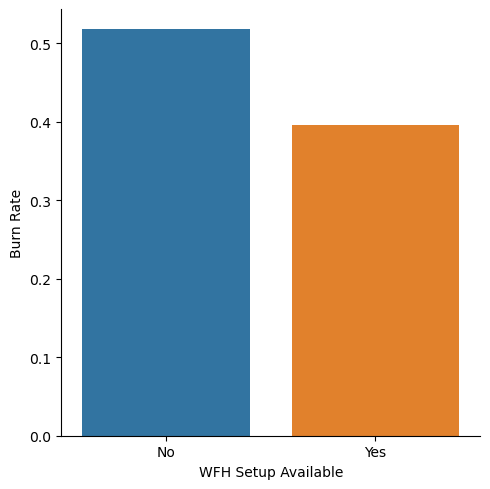

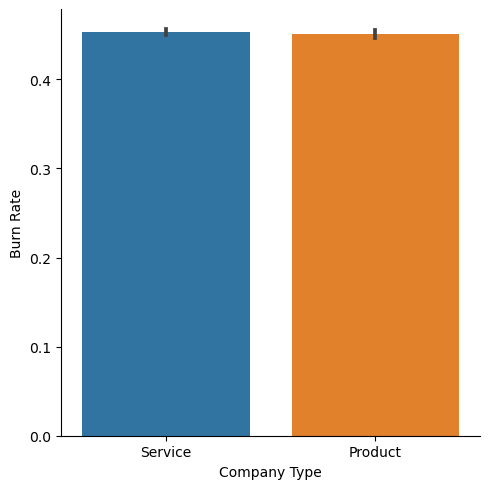

In [17]:
sns.catplot(x='WFH Setup Available', y='Burn Rate', data=df, kind='bar', ci=None)
plt.show()
sns.catplot(x='Company Type', y='Burn Rate', data=df, kind='bar') 
plt.show()

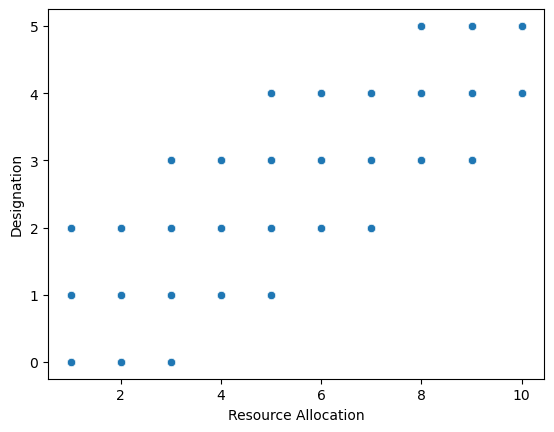

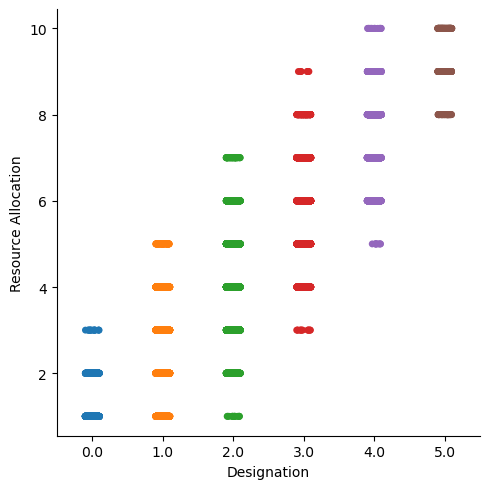

In [18]:
sns.scatterplot(data=df, x="Resource Allocation", y="Designation")
#sns.rugplot(data=df_imputed, x="Resource Allocation", y="Designation",height=0.025, expand_margins=True)
#sns.lineplot(data=df_imputed, x="Resource Allocation", y="Designation")
sns.catplot(data=df, x="Designation", y="Resource Allocation")
plt.show()

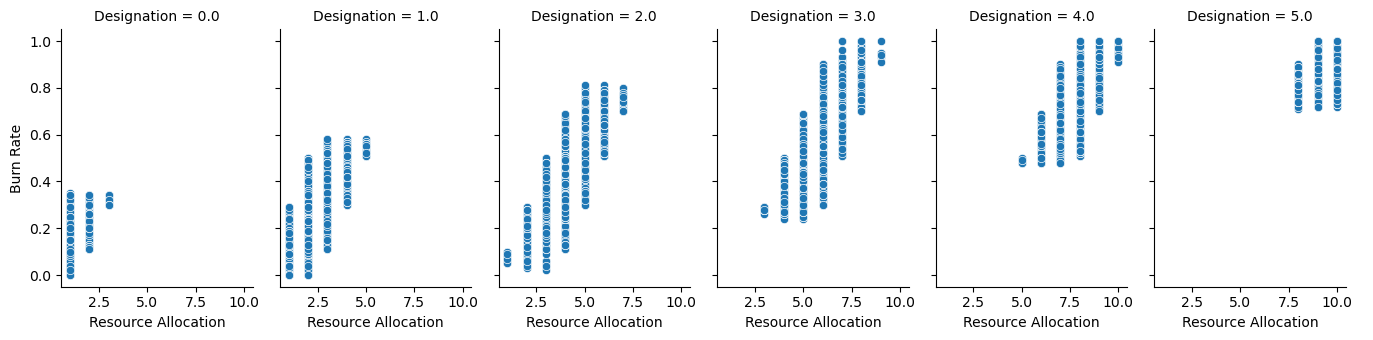

In [19]:
g = sns.FacetGrid(data=df, col="Designation", height=3.5, aspect=.65)
g.map_dataframe(sns.scatterplot, x="Resource Allocation", y="Burn Rate")
g.add_legend()
plt.show()

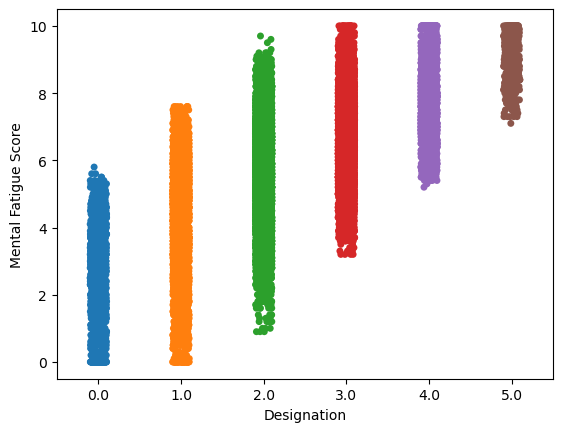

In [20]:
sns.stripplot(data=df, y="Mental Fatigue Score", x="Designation")
plt.show()

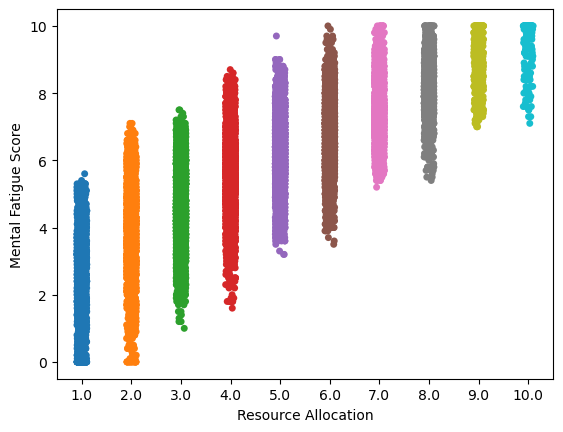

In [21]:
sns.stripplot(data=df, y="Mental Fatigue Score", x="Resource Allocation")
plt.show()

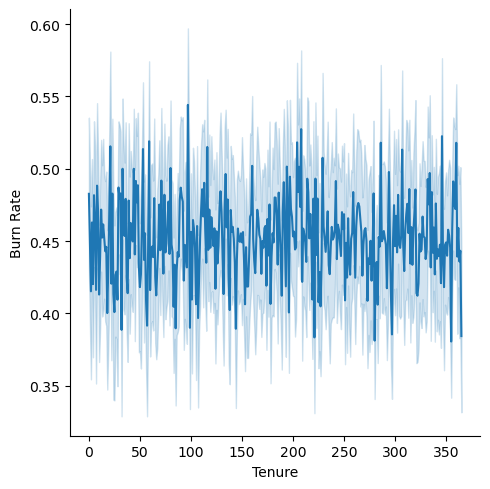

In [22]:
sns.relplot(data= df, x="Tenure", y="Burn Rate", kind="line")
plt.show()

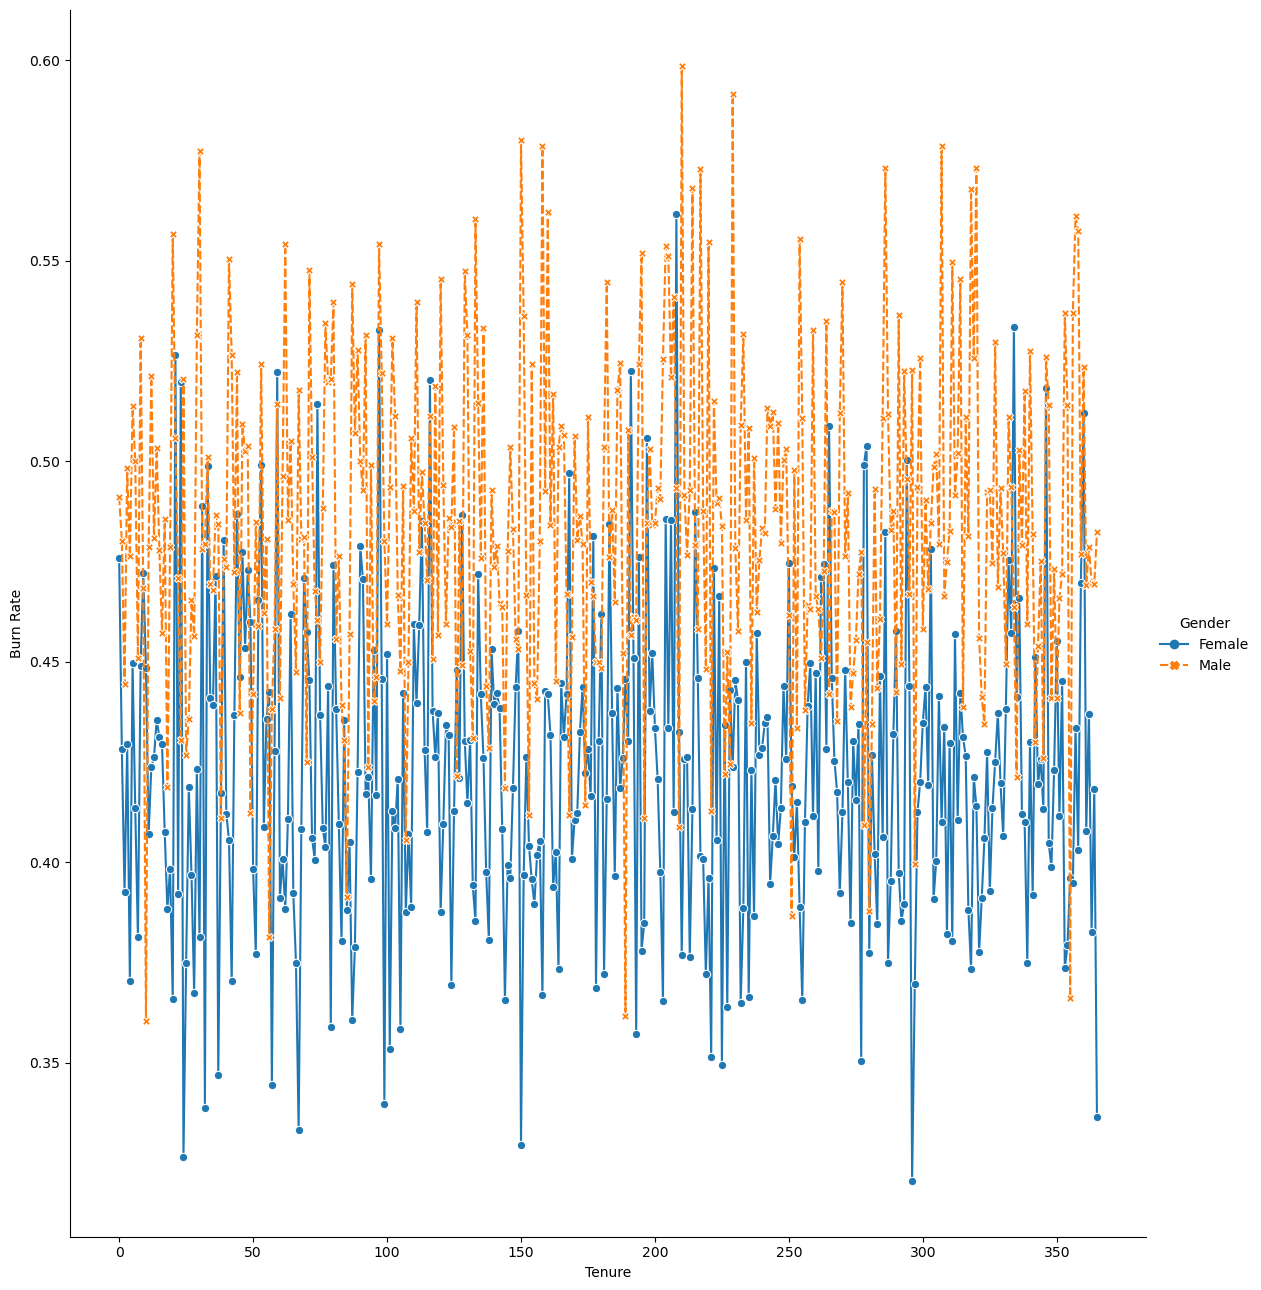

In [23]:
sns.relplot(data=df, x="Tenure", y="Burn Rate", kind='line', hue='Gender', style='Gender',height=13, aspect=0.9,markers=True, ci=None)
plt.show()

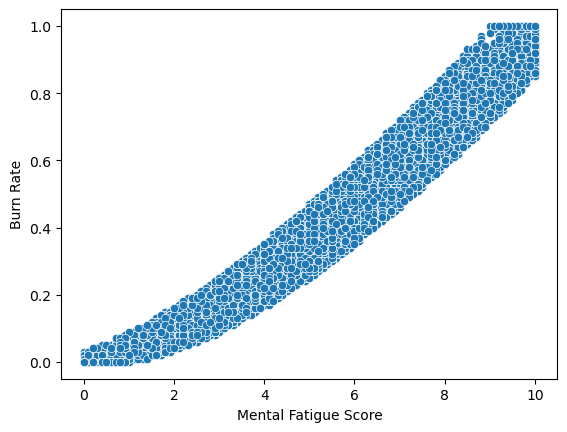

In [24]:
sns.scatterplot(data=df, x='Mental Fatigue Score', y='Burn Rate' )
plt.show()

In [25]:
df.isna().sum()

Employee ID                0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
Tenure                     0
dtype: int64

In [26]:
#imputation by filling missing values with the mean of the column

# Create a copy of the original dataframe to store the imputed values
df_imputed = df.copy()

# Iterate through each column in the dataframe
for col in df.columns:
    # Check if the column has missing values
    if df[col].isnull().any():
        # Store the mean value of the non-missing values
        mean_val = df[col].mean()
        # Replace the missing values with the mean value
        df_imputed[col].fillna(mean_val, inplace=True)

# one-hot Encoding

In [27]:
df_imputed['Gender']= pd.get_dummies(df_imputed.Gender, drop_first=True)
df_imputed['Company Type'] = pd.get_dummies(df_imputed["Company Type"], drop_first=True)
df_imputed['WFH Setup Available'] = pd.get_dummies(df_imputed["WFH Setup Available"], drop_first=True)

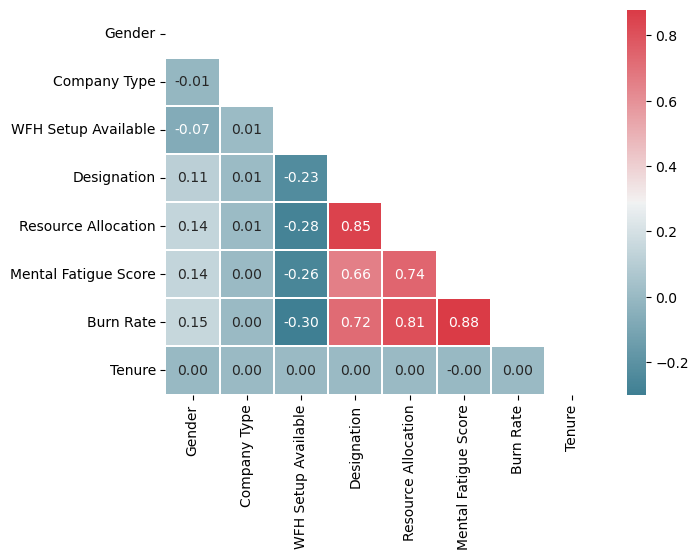

In [28]:
corr = df_imputed.corr()
fig, ax = plt.subplots(figsize=(7, 5))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .2, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

In [29]:
df_imputed=df_imputed.drop(['Employee ID'] , axis=1)

In [30]:
df_imputed

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure
0,0,1,0,2.0,3.000000,3.800000,0.16,92
1,1,1,1,1.0,2.000000,5.000000,0.36,31
2,0,0,1,2.0,4.481398,5.800000,0.49,296
3,1,1,1,1.0,1.000000,2.600000,0.20,58
4,0,1,0,3.0,7.000000,6.900000,0.52,160
...,...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,5.728188,0.41,1
22746,0,0,1,3.0,6.000000,6.700000,0.59,347
22747,1,1,1,3.0,7.000000,5.728188,0.72,56
22748,0,1,0,2.0,5.000000,5.900000,0.52,356


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Create a function that splits data into k-folds and trains it with multiple ML models recursively. Predict them and Evaluate model performances using MSE, MAE, R2 and cross validation scores and return them.

In [32]:
def kfold_multiple_ml_algorithms(df, target_column, classifiers, k):
    kf = KFold(n_splits=k)
    scores = {}
    
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    for classifier in classifiers:
        mse_scores = []
        r2_scores = []
        mae_scores = []
        cv_scores = cross_val_score(classifier, X, y, cv=kf, scoring="explained_variance")
        
            
        for train_index, test_index in kf.split(df):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            clf = classifier.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2_score(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            
        
        scores[classifier.__class__.__name__] = {
            "mean_squared_error": np.mean(mse_scores),
            "r2_score": np.mean(r2_scores),
            "mean_absolute_error": np.mean(mae_scores),
            "cross_validation_score": np.mean(cv_scores)
            
        }
        
        
    return scores

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [34]:
classifiers = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
               GradientBoostingRegressor(n_estimators=3,learning_rate=1), svm.SVR(), KNeighborsRegressor(n_neighbors=3),
               Lasso(alpha=0.002), ElasticNet()]
scores = kfold_multiple_ml_algorithms(df_imputed, "Burn Rate", classifiers, 5)

results = pd.DataFrame(scores).T
results.reset_index(inplace=True)
results.rename(columns={"index": "Classifier"}, inplace=True)

In [35]:
print(results)

                  Classifier  mean_squared_error  r2_score  \
0           LinearRegression            0.006302  0.831209   
1      DecisionTreeRegressor            0.010535  0.717844   
2      RandomForestRegressor            0.005948  0.840681   
3  GradientBoostingRegressor            0.006657  0.821685   
4                        SVR            0.005777  0.845280   
5        KNeighborsRegressor            0.007295  0.804625   
6                      Lasso            0.006312  0.830958   
7                 ElasticNet            0.037351 -0.000034   

   mean_absolute_error  cross_validation_score  
0             0.057500            8.312161e-01  
1             0.073431            7.189630e-01  
2             0.056082            8.411995e-01  
3             0.061680            8.216970e-01  
4             0.056968            8.457694e-01  
5             0.063281            8.046520e-01  
6             0.057530            8.309649e-01  
7             0.151667            4.440892e-17  


In [36]:
import plotly.express as px

In [44]:
fig_acc = px.line(results, x='Classifier', y='r2_score', title='R^2 scores')
fig_acc.show()

In [45]:
fig = px.scatter(results, x="mean_squared_error", y="r2_score", symbol="Classifier", title= "MSE & R^2 scores")
fig.show()

Due to the collinearity of the mental fatigue score and the burn rate, we cannot use to effectively predict. Thus, I am inclined to drop it to avoid overfitting.

In [39]:
df_imputed=df_imputed.drop(['Mental Fatigue Score'] , axis=1)

In [40]:
scores = kfold_multiple_ml_algorithms(df_imputed, "Burn Rate", classifiers, 5)

results = pd.DataFrame(scores).T
results.reset_index(inplace=True)
results.rename(columns={"index": "Classifier"}, inplace=True)

In [41]:
print(results)

                  Classifier  mean_squared_error  r2_score  \
0           LinearRegression            0.012401  0.667831   
1      DecisionTreeRegressor            0.021436  0.425686   
2      RandomForestRegressor            0.014713  0.605877   
3  GradientBoostingRegressor            0.011952  0.679893   
4                        SVR            0.011373  0.695409   
5        KNeighborsRegressor            0.014825  0.602877   
6                      Lasso            0.012409  0.667610   
7                 ElasticNet            0.037351 -0.000034   

   mean_absolute_error  cross_validation_score  
0             0.088289            6.678460e-01  
1             0.114727            4.248011e-01  
2             0.095737            6.049798e-01  
3             0.087015            6.799312e-01  
4             0.084494            6.954621e-01  
5             0.096428            6.029071e-01  
6             0.088296            6.676240e-01  
7             0.151667            4.440892e-17  


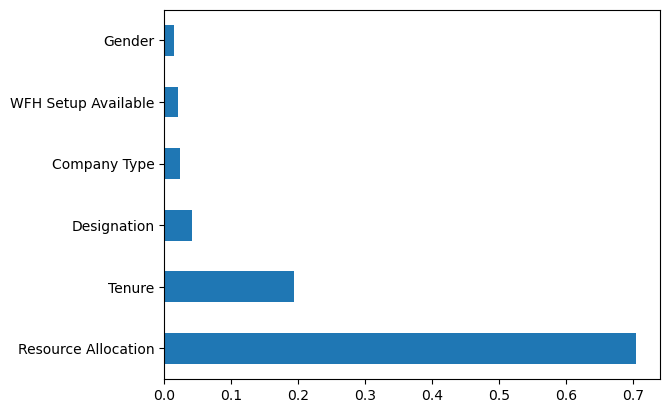

In [42]:
X_import = df_imputed.drop("Burn Rate", axis=1)
y_import = df_imputed["Burn Rate"]
# Train the decision tree regressor
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_import, y_import)

# Get feature importances
importances = regr.feature_importances_

# Plot the feature importances
feat_importances = pd.Series(importances, index=X_import.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [50]:
df_red= df_imputed.drop(["Gender", "Company Type"], axis=1)
scores = kfold_multiple_ml_algorithms(df_red, "Burn Rate", classifiers, 5)

results = pd.DataFrame(scores).T
results.reset_index(inplace=True)
results.rename(columns={"index": "Classifier"}, inplace=True)

In [51]:
print(results)

                  Classifier  mean_squared_error  r2_score  \
0           LinearRegression            0.012449  0.666542   
1      DecisionTreeRegressor            0.018799  0.496383   
2      RandomForestRegressor            0.015220  0.592268   
3  GradientBoostingRegressor            0.011830  0.683161   
4                        SVR            0.011378  0.695272   
5        KNeighborsRegressor            0.014895  0.601032   
6                      Lasso            0.012455  0.666385   
7                 ElasticNet            0.037351 -0.000034   

   mean_absolute_error  cross_validation_score  
0             0.088439            6.665544e-01  
1             0.107237            4.964731e-01  
2             0.097534            5.925550e-01  
3             0.086725            6.831891e-01  
4             0.084447            6.953266e-01  
5             0.096588            6.010609e-01  
6             0.088446            6.663968e-01  
7             0.151667            4.440892e-17  


Given that our highest performing model is Support Vector Regression, we will use it to predict and visualize how predicts do compared to actual data

In [58]:
from sklearn.model_selection import train_test_split
X = df_red.drop('Burn Rate', axis=1)
y = df_red['Burn Rate']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#model training
svr = svm.SVR()
y_pred = svr.fit(X_train, y_train).predict(X_test)

#visualize actual vs predicted
fig = px.scatter(x=y_test.index, y=y_test, labels={'x': 'Index', 'y': 'y'})
fig.add_scatter(x=y_test.index, y=y_pred, mode='markers', name='SVM Regression')
fig.show()

# CONCLUSIONS

Data Limitations:

As discussed earlier, there is little known about the data collection methods such as the demographic of the sample space, its randomness, and some specifities that would improve prediciton such as industry. Furthermore, it would have been helpful to determine how the quantifiable metrics were collected, ie how is the burn rate determined, how about designation? Is it self reported, machine generated or determined by management. The lack of this information decreases the confidence of the model and its application. 

Research Questions:
I set out to determine if the variables I had were best to predicit employee burn rate. While they were not best, I believe they are impactful in making human resource management decisions. I was able to establish the importance of resource allocation (hours spent at work) as a feature in predicting burn rate. On average the people who work longer experience more burn rate. There is also a positive relationship between designation of work and the resource allocarion, even though there is also a lot of variability in the data points. Another notable feature is the work from home setup available to the employees: there is a smaller edge that employees who have this option have over those who don't when it comes to burn rate.

Proposal:
As far as determining the causes of burnout and prediciting when an employee migt be burnt out, it is better to collect more information than this dataset offered. Things to include might be: field/industry, seniority level of employee, compesation and benefits. 

Given that resource allocation and designation are vital to employee burn rate. It would be best to revise assignment, such that people tasks are equitably divided between workers hence no one is at work longer than they need to be. 
